<a href="https://colab.research.google.com/github/vishalrk1/tensorflow_course/blob/main/NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation

In [ ]:

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# importing helper function
from helper_functions import create_tensorboard_callback, plot_loss_curves, pred_and_plot, unzip_data, walk_through_dir

--2021-10-10 12:35:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-10-10 12:35:42 (83.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



#Text data

* We are using kaggles intpro to nlp dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2021-10-10 12:35:42--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2021-10-10 12:35:42 (127 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



#EDA

In [ ]:
unzip_data('nlp_getting_started.zip')

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
train_df_shuffled = train_data.sample(frac=1, random_state=42)

In [ ]:
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [ ]:
train_data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
import random
random_index = random.randint(0, len(train_data)-5)

for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", '(real diaster)' if target > 0 else '(not real diaster)')
  print(f"Text: {text}")
  print('---\n')

Target: 0 (not real diaster)
Text: A friend is like blood they are not beside us always. But they come out when we are wounded.
---

Target: 0 (not real diaster)
Text: Motors Hot Deals #452 &gt;&gt; http://t.co/ED32PBviO7 10x 27W 12V 24V LED Work Light FLOOD Lamp Tractor Truck SUV UTV AÛ_ http://t.co/IfM6v6480P
---

Target: 1 (real diaster)
Text: I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM
---

Target: 0 (not real diaster)
Text: Also in a matter of weeks Amazon's going to be deluged with poorly written indie dystopian fiction about teens escaping from blood farms.
---

Target: 0 (not real diaster)
Text: Captain Abbott must go down with LNP boat #refugees #christianvalues https://t.co/Kp5dpOaF58
---



#Spliting data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(
    train_df_shuffled['text'].to_numpy(), 
    train_df_shuffled['target'].to_numpy(),
    test_size=0.2, 
    random_state=42,
)

In [ ]:
len(train_sentences), len(val_sentences)

(6090, 1523)

In [ ]:
train_sentences[:10]

array(['Detonation fashionable mountaineering electronic watch water-resistant couples leisure tab\x89Û_ http://t.co/E61x9Y65QD http://t.co/OVLET0gDqm',
       "Men escape car engulfed in flames in Parley's Canyon crews investigating cause - http://t.co/tFan6qq2Ys http://t.co/rAkwWritPo",
       'I-77 Mile Marker 31 to 40 South Mooresville  Iredell Vehicle Accident Congestion at 8/6 1:18 PM',
       "#Greece's tax revenues collapse as debt crisis continues via @guardian #bailout http://t.co/cJvbQXw83s ^mp",
       'Be not afraid of sudden fear neither of the desolation of the wicked when it cometh. For the Lord shall be thy... http://t.co/bP597YDs2b',
       'Storm batters Auckland and Northland: A violent overnight storm has battered Auckland and Northland uprooting... http://t.co/enrPGRgtTs',
       "Benzema increasingly looks to be a casualty of Benitez's new look squad. Arsenal bound? 50-50 chance I think",
       'Acquire your postexistence straight a elevation in addition to uphe

In [ ]:
train_labels[:10]

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1])

#Converting Text into numbers 

* **Tokenization:** straight mapping from token to number ( can be modelled but quick gets too big)
* **Embedding:** RIcher representation of relationship between tokens ( can limit size + can be learned)

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
# text_vectorizer = TextVectorization(
#     max_tokens=10000,
#     standardize='lower_and_strip_punctuation',
#     split='whitespace',
#     output_mode='int',
#     output_sequence_length=None,
#     pad_to_max_tokens=True,
# )

* Finfding the average numbers o token (words) in the training tweets

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/ len(train_sentences))

15

* setting up text vectorization

In [ ]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    output_mode='int',
    output_sequence_length=max_length,
)

* mapping text vectorizer to trian data

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
# ssample 
sample_txt = 'there is a fire in mountains'
text_vectorizer([sample_txt])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  75,    9,    3,   44,    4, 3339,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
random_txt = random.choice(train_sentences)
print(random_txt)
text_vectorizer([random_txt])

Dr Jack Stern Interview Ending Back Pain for #Military #Injury. Listen now: http://t.co/YhH7X0MAio


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1308, 2235, 7461, 2242, 3595,   87,  901,   10,  252,  355, 1092,
          49,    1,    0,    0]])>

* All the unique words in vocabularuy

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Top words = {top_5_words}")
print(f"botoom words = {bottom_5_words}")

Top words = ['', '[UNK]', 'the', 'a', 'in']
botoom words = ['minded', 'mindblowing', 'milne', 'milledgeville', 'millcityio']


##**Creating and Embedding**

In [ ]:
embedding = layers.Embedding(
    input_dim = max_vocab_length, 
    output_dim = 128,
    input_length = max_length,
)

In [ ]:
# testin output on random sample
random_txt = random.choice(train_sentences)
print(f"{random_txt}\n")
embedding(text_vectorizer([random_txt]))

Tomorrow's evening commute receives a RED LIGHT. A rainstorm impacting the region will push it's way in late evening. http://t.co/DRvm8ISOtE



<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0097683 , -0.03532   , -0.0375388 , ...,  0.03269902,
          0.03462768,  0.02940806],
        [ 0.02311753, -0.0487127 , -0.02819159, ..., -0.03896398,
          0.00074847, -0.04364047],
        [-0.00890167, -0.03441294, -0.01177008, ...,  0.04395248,
         -0.00972424, -0.00537852],
        ...,
        [ 0.02206543, -0.0468816 ,  0.04538914, ...,  0.0330366 ,
         -0.04132297,  0.04651804],
        [ 0.01358756,  0.01141802, -0.01478847, ...,  0.03177066,
          0.01923456,  0.04971106],
        [ 0.01326852,  0.02219133,  0.03666616, ..., -0.01550306,
         -0.03052937, -0.00233827]]], dtype=float32)>

#Bulding Different Model

##0. NaiveBase Model

In [ ]:
 from sklearn.feature_extraction.text import TfidfVectorizer
 from sklearn.naive_bayes import MultinomialNB
 from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
                     ('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# evaluation model 
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.799080761654629

In [ ]:
baseline_pred = model_0.predict(val_sentences)

###Function for model evaluation

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

In [ ]:
def calculate_result(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {
      'accurecy': accuracy,
      'precision': model_precision,
      'recall': model_recall,
      'f1-score': model_f1,
  }

  return model_results

In [ ]:
baseline_results = calculate_result(y_true=val_labels, y_pred=baseline_pred)
baseline_results

{'accurecy': 0.799080761654629,
 'f1-score': 0.7920155324845473,
 'precision': 0.8146358812834972,
 'recall': 0.799080761654629}

##1. A Simple dense model

In [ ]:
from helper_functions import create_tensorboard_callback

save_dir = 'model_1_logs'

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model_1.fit(
    x=train_sentences,
    y=train_labels,
    epochs=5,
    validation_data = (val_sentences, val_labels),
    callbacks = [
                 create_tensorboard_callback(dir_name=save_dir,experiment_name='model_1')
    ]
)

Saving TensorBoard log files to: model_1_logs/model_1/20211010-123544
Epoch 1/5
191/191 [==============================] - 4s 18ms/step - loss: 0.6197 - accuracy: 0.6880 - val_loss: 0.5459 - val_accuracy: 0.7492
Epoch 2/5
191/191 [==============================] - 3s 16ms/step - loss: 0.4526 - accuracy: 0.8144 - val_loss: 0.4743 - val_accuracy: 0.7853
Epoch 3/5
191/191 [==============================] - 3s 16ms/step - loss: 0.3519 - accuracy: 0.8598 - val_loss: 0.4616 - val_accuracy: 0.7932
Epoch 4/5
191/191 [==============================] - 3s 16ms/step - loss: 0.2855 - accuracy: 0.8898 - val_loss: 0.4656 - val_accuracy: 0.7912
Epoch 5/5
191/191 [==============================] - 3s 16ms/step - loss: 0.2362 - accuracy: 0.9125 - val_loss: 0.4791 - val_accuracy: 0.7899


In [ ]:
model_1.evaluate(val_sentences, val_labels)

48/48 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7899


[0.4791228473186493, 0.7898883819580078]

In [ ]:
model_1_pred = model_1.predict(val_sentences)

In [ ]:
model_1_pred

array([[0.3993531 ],
       [0.85578084],
       [0.9968852 ],
       ...,
       [0.3369968 ],
       [0.9724716 ],
       [0.9962152 ]], dtype=float32)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred))
model_1_preds

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 1., 1., ..., 0., 1., 1.], dtype=float32)>

In [ ]:
model_1_results = calculate_result(val_labels, model_1_preds)

###**Vizualizing learned embedding**

In [ ]:
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
embed_weights = model_1.get_layer('embedding').get_weights()[0]
embed_weights.shape

(10000, 128)

##3. RNN Model:- LSTM

* **LSTM MODEL**

In [ ]:
inputs = layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_2 = tf.keras.Model(inputs, outputs, name='model_2_LSTM')

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 15, 64)            49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [ ]:
model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model_2.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [create_tensorboard_callback(save_dir, 'model_2_logs')]
)

Saving TensorBoard log files to: model_1_logs/model_2_logs/20211010-123602
Epoch 1/5
191/191 [==============================] - 12s 44ms/step - loss: 0.2142 - accuracy: 0.9243 - val_loss: 0.5637 - val_accuracy: 0.7853
Epoch 2/5
191/191 [==============================] - 7s 37ms/step - loss: 0.1539 - accuracy: 0.9455 - val_loss: 0.6555 - val_accuracy: 0.7630
Epoch 3/5
191/191 [==============================] - 7s 36ms/step - loss: 0.1187 - accuracy: 0.9567 - val_loss: 0.7890 - val_accuracy: 0.7814
Epoch 4/5
191/191 [==============================] - 7s 37ms/step - loss: 0.0981 - accuracy: 0.9624 - val_loss: 0.8016 - val_accuracy: 0.7754
Epoch 5/5
191/191 [==============================] - 7s 37ms/step - loss: 0.0789 - accuracy: 0.9688 - val_loss: 0.9348 - val_accuracy: 0.7833


In [ ]:
model_2_pred = model_2.predict(val_sentences)
model_2_pred

array([[0.07506433],
       [0.91121113],
       [0.99994355],
       ...,
       [0.97416455],
       [0.9999695 ],
       [0.9999368 ]], dtype=float32)

In [ ]:
model_2_pred = tf.squeeze(tf.round(model_2_pred))
model_2_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [ ]:
model_2_results = calculate_result(val_labels, model_2_pred)
model_2_results

{'accurecy': 0.783322390019698,
 'f1-score': 0.7813511279429699,
 'precision': 0.7834084730864105,
 'recall': 0.783322390019698}

##4. GRU Model

* Gated Recurrent unit

In [ ]:
inputs = layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(56)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs, outputs, name='model_3_GRU')

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 15, 64)            37248     
_________________________________________________________________
lstm_2 (LSTM)                (None, 15, 64)            33024     
_________________________________________________________________
gru_1 (GRU)                  (None, 56)                20496     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                

In [ ]:
model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'],
)

In [ ]:
model_3.fit(
    train_sentences,
    train_labels,
    epochs = 10,
    validation_data = (val_sentences, val_labels),
    callbacks = [
                 create_tensorboard_callback(save_dir,'model_3_GRU1')
    ]
)

Saving TensorBoard log files to: model_1_logs/model_3_GRU1/20211010-123648
Epoch 1/10
191/191 [==============================] - 15s 54ms/step - loss: 0.1264 - accuracy: 0.9586 - val_loss: 0.7107 - val_accuracy: 0.7689
Epoch 2/10
191/191 [==============================] - 9s 45ms/step - loss: 0.0722 - accuracy: 0.9721 - val_loss: 0.9497 - val_accuracy: 0.7617
Epoch 3/10
191/191 [==============================] - 9s 47ms/step - loss: 0.0611 - accuracy: 0.9750 - val_loss: 0.9730 - val_accuracy: 0.7761
Epoch 4/10
191/191 [==============================] - 9s 46ms/step - loss: 0.0555 - accuracy: 0.9744 - val_loss: 1.1584 - val_accuracy: 0.7820
Epoch 5/10
191/191 [==============================] - 9s 46ms/step - loss: 0.0524 - accuracy: 0.9762 - val_loss: 1.1763 - val_accuracy: 0.7781
Epoch 6/10
191/191 [==============================] - 9s 47ms/step - loss: 0.0442 - accuracy: 0.9778 - val_loss: 1.1818 - val_accuracy: 0.7630
Epoch 7/10
191/191 [==============================] - 9s 46ms/step

In [ ]:
model_3_pred = model_3.predict(val_sentences)

model_3_pred = tf.squeeze(tf.round(model_3_pred))
model_3_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [ ]:
model_3_results = calculate_result(val_labels, model_3_pred)
model_3_results

{'accurecy': 0.7649376231122784,
 'f1-score': 0.7646837252279525,
 'precision': 0.764525640899841,
 'recall': 0.7649376231122784}

##5. GRU Model 2

In [ ]:
inputs = layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs, outputs, name='model_4_GRU')

In [ ]:
model_4.summary()

Model: "model_4_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 1,321,473
Trainable params: 1,321,473
Non-trainable params: 0
_____________________________________________

In [ ]:
model_4.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'],
)

model_4.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [
                 create_tensorboard_callback(save_dir,'model_4_GRU2')
    ]
)

Saving TensorBoard log files to: model_1_logs/model_4_GRU2/20211010-123824
Epoch 1/5
191/191 [==============================] - 8s 31ms/step - loss: 0.1382 - accuracy: 0.9432 - val_loss: 1.0064 - val_accuracy: 0.7623
Epoch 2/5
191/191 [==============================] - 5s 28ms/step - loss: 0.0562 - accuracy: 0.9778 - val_loss: 1.1125 - val_accuracy: 0.7722
Epoch 3/5
191/191 [==============================] - 5s 28ms/step - loss: 0.0429 - accuracy: 0.9808 - val_loss: 1.3071 - val_accuracy: 0.7728
Epoch 4/5
191/191 [==============================] - 5s 27ms/step - loss: 0.0342 - accuracy: 0.9823 - val_loss: 1.6632 - val_accuracy: 0.7728
Epoch 5/5
191/191 [==============================] - 5s 27ms/step - loss: 0.0313 - accuracy: 0.9839 - val_loss: 1.8201 - val_accuracy: 0.7663


In [ ]:
model_4_pred = model_4.predict(val_sentences)

model_4_pred = tf.squeeze(tf.round(model_4_pred))
model_4_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([0., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_result(val_labels, model_4_pred)
model_4_results

{'accurecy': 0.7662508207485227,
 'f1-score': 0.7652319185166614,
 'precision': 0.7653988161547901,
 'recall': 0.7662508207485227}

##6. Bidirectional-LSTM RNN Model

In [ ]:
inputs = layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(
    layers.LSTM(64, return_sequences=True)
)(x)

x = layers.Bidirectional(
    layers.GRU(64)
)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_bidirectional')

In [ ]:
model_5.summary()

Model: "model_5_bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 128)           98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               74496     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 1,453,441
Trainable params: 1,453,441
Non-trainable params: 0
___________________________________

In [ ]:
model_5.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
model_5.fit(
    train_sentences,
    train_labels,
    epochs = 10,
    validation_data = (val_sentences, val_labels),
    callbacks = [
                 create_tensorboard_callback(save_dir, 'model_5_bidirectional')
    ]
)

Saving TensorBoard log files to: model_1_logs/model_5_bidirectional/20211010-123909
Epoch 1/10
191/191 [==============================] - 19s 67ms/step - loss: 0.0848 - accuracy: 0.9704 - val_loss: 0.9405 - val_accuracy: 0.7649
Epoch 2/10
191/191 [==============================] - 11s 58ms/step - loss: 0.0367 - accuracy: 0.9803 - val_loss: 1.5736 - val_accuracy: 0.7590
Epoch 3/10
191/191 [==============================] - 11s 57ms/step - loss: 0.0347 - accuracy: 0.9829 - val_loss: 1.5397 - val_accuracy: 0.7590
Epoch 4/10
191/191 [==============================] - 11s 57ms/step - loss: 0.0311 - accuracy: 0.9831 - val_loss: 1.7743 - val_accuracy: 0.7643
Epoch 5/10
191/191 [==============================] - 11s 57ms/step - loss: 0.0326 - accuracy: 0.9836 - val_loss: 1.4706 - val_accuracy: 0.7623
Epoch 6/10
191/191 [==============================] - 11s 58ms/step - loss: 0.0334 - accuracy: 0.9834 - val_loss: 1.3520 - val_accuracy: 0.7452
Epoch 7/10
191/191 [==============================] 

In [ ]:
model_5_pred = model_5.predict(val_sentences)

model_5_pred = tf.squeeze(tf.round(model_5_pred))
model_5_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_result(val_labels, model_5_pred)
model_5_results

{'accurecy': 0.7491792514773473,
 'f1-score': 0.749742655727938,
 'precision': 0.7509677779275278,
 'recall': 0.7491792514773473}

###7. Conv1D Model

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(
    filters = 64,
    kernel_size = 5,
    padding = 'valid',
    activation='relu',
)(x)

x = layers.GlobalMaxPool1D(name='max_pool_layer')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_6 = tf.keras.Model(inputs, outputs)

In [ ]:
model_6.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 11, 64)            41024     
_________________________________________________________________
max_pool_layer (GlobalMaxPoo (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 1,321,089
Trainable params: 1,321,089
Non-trainable params: 0
___________________________________________________

In [ ]:
model_6.compile(
    loss='binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'], 
)

In [ ]:
model_6.fit(
    train_sentences,
    train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels),
    callbacks = [
                 create_tensorboard_callback(save_dir, 'model_6_conv1D')
    ]
)

Saving TensorBoard log files to: model_1_logs/model_6_conv1D/20211010-124108
Epoch 1/5
191/191 [==============================] - 5s 21ms/step - loss: 0.1054 - accuracy: 0.9681 - val_loss: 0.9253 - val_accuracy: 0.7617
Epoch 2/5
191/191 [==============================] - 4s 19ms/step - loss: 0.0589 - accuracy: 0.9791 - val_loss: 1.0708 - val_accuracy: 0.7643
Epoch 3/5
191/191 [==============================] - 4s 19ms/step - loss: 0.0505 - accuracy: 0.9803 - val_loss: 1.1215 - val_accuracy: 0.7630
Epoch 4/5
191/191 [==============================] - 4s 19ms/step - loss: 0.0437 - accuracy: 0.9810 - val_loss: 1.2103 - val_accuracy: 0.7551
Epoch 5/5
191/191 [==============================] - 4s 19ms/step - loss: 0.0418 - accuracy: 0.9828 - val_loss: 1.2054 - val_accuracy: 0.7538


In [ ]:
model_6_pred = model_6.predict(val_sentences)

model_6_pred = tf.squeeze(tf.round(model_6_pred))
model_6_pred

<tf.Tensor: shape=(1523,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>

In [ ]:
model_6_results = calculate_result(val_labels, model_6_pred)
model_6_results

{'accurecy': 0.7537754432042022,
 'f1-score': 0.7541310257391018,
 'precision': 0.7547217550553371,
 'recall': 0.7537754432042022}

In [ ]:
baseline_results

{'accurecy': 0.799080761654629,
 'f1-score': 0.7920155324845473,
 'precision': 0.8146358812834972,
 'recall': 0.799080761654629}

##8. Pretrained Model

In [ ]:
import tensorflow_hub as hub

In [ ]:
embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [ ]:
random_txt

"Tomorrow's evening commute receives a RED LIGHT. A rainstorm impacting the region will push it's way in late evening. http://t.co/DRvm8ISOtE"

In [ ]:
sample = embed([random_txt])
sample.shape

TensorShape([1, 512])

In [ ]:
sentence_encoder_layer = hub.KerasLayer(
    'https://tfhub.dev/google/universal-sentence-encoder/4',
    input_shape=[],
    dtype = tf.string,
    trainable =False,
    name = "USE"
)

In [ ]:
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(1, activation='sigmoid')
], name = 'modes_7_USE')

model_7.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'],
)

In [ ]:
model_7.summary()

Model: "modes_7_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
model_7.fit(
    train_sentences,
    train_labels,
    epochs = 10,
    validation_data = (val_sentences, val_labels),
    callbacks = [
                create_tensorboard_callback(save_dir, 'model_7_USE')
    ]
)

Saving TensorBoard log files to: model_1_logs/model_7_USE/20211010-124149
Epoch 1/10
191/191 [==============================] - 8s 27ms/step - loss: 0.6499 - accuracy: 0.7342 - val_loss: 0.6155 - val_accuracy: 0.7695
Epoch 2/10
191/191 [==============================] - 3s 13ms/step - loss: 0.5886 - accuracy: 0.7877 - val_loss: 0.5676 - val_accuracy: 0.7807
Epoch 3/10
191/191 [==============================] - 2s 13ms/step - loss: 0.5470 - accuracy: 0.7949 - val_loss: 0.5359 - val_accuracy: 0.7800
Epoch 4/10
191/191 [==============================] - 2s 13ms/step - loss: 0.5183 - accuracy: 0.7993 - val_loss: 0.5140 - val_accuracy: 0.7800
Epoch 5/10
191/191 [==============================] - 2s 13ms/step - loss: 0.4975 - accuracy: 0.8011 - val_loss: 0.4985 - val_accuracy: 0.7820
Epoch 6/10
191/191 [==============================] - 3s 13ms/step - loss: 0.4819 - accuracy: 0.8031 - val_loss: 0.4872 - val_accuracy: 0.7846
Epoch 7/10
191/191 [==============================] - 3s 13ms/step -

In [ ]:
model_7_pred = model_7.predict(val_sentences)

model_7_pred = tf.squeeze(tf.round(model_7_pred))

model_7_results = calculate_result(val_labels, model_7_pred)
model_7_results

{'accurecy': 0.788575180564675,
 'f1-score': 0.787547777697963,
 'precision': 0.7879892196024489,
 'recall': 0.788575180564675}

In [ ]:
baseline_results

{'accurecy': 0.799080761654629,
 'f1-score': 0.7920155324845473,
 'precision': 0.8146358812834972,
 'recall': 0.799080761654629}

##Model 8

In [ ]:
model_8 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name = 'modes_7_USE')

model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'],
)

history_model_8 = model_8.fit(
    train_sentences,
    train_labels,
    epochs = 10,
    validation_data = (val_sentences, val_labels),
    callbacks = [
                create_tensorboard_callback(save_dir, 'model_8_USE')
    ]
)

Saving TensorBoard log files to: model_1_logs/model_8_USE/20211010-124220
Epoch 1/10
191/191 [==============================] - 5s 19ms/step - loss: 0.5096 - accuracy: 0.7841 - val_loss: 0.4495 - val_accuracy: 0.7938
Epoch 2/10
191/191 [==============================] - 3s 13ms/step - loss: 0.4131 - accuracy: 0.8148 - val_loss: 0.4421 - val_accuracy: 0.7965
Epoch 3/10
191/191 [==============================] - 3s 13ms/step - loss: 0.3981 - accuracy: 0.8228 - val_loss: 0.4413 - val_accuracy: 0.7991
Epoch 4/10
191/191 [==============================] - 2s 12ms/step - loss: 0.3895 - accuracy: 0.8282 - val_loss: 0.4395 - val_accuracy: 0.8043
Epoch 5/10
191/191 [==============================] - 3s 13ms/step - loss: 0.3836 - accuracy: 0.8278 - val_loss: 0.4374 - val_accuracy: 0.8089
Epoch 6/10
191/191 [==============================] - 2s 12ms/step - loss: 0.3774 - accuracy: 0.8307 - val_loss: 0.4363 - val_accuracy: 0.8116
Epoch 7/10
191/191 [==============================] - 3s 13ms/step -

In [ ]:
model_8_pred = model_8.predict(val_sentences)

model_8_pred = tf.squeeze(tf.round(model_8_pred))

model_8_results = calculate_result(val_labels, model_8_pred)
model_8_results

{'accurecy': 0.7997373604727511,
 'f1-score': 0.7986346719749209,
 'precision': 0.7993683117170154,
 'recall': 0.7997373604727511}

##Training Model on 10% dataset

In [ ]:

# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [ ]:
model_9 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name = 'modes_9')

model_9.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'],
)

history_model_8 = model_9.fit(
    train_sentences_10_percent,
    train_labels_10_percent,
    epochs = 10,
    validation_data = (val_sentences, val_labels),
    callbacks = [
                create_tensorboard_callback(save_dir, 'model_8_USE')
    ]
)

Saving TensorBoard log files to: model_1_logs/model_8_USE/20211010-125843
Epoch 1/10
20/20 [==============================] - 3s 94ms/step - loss: 0.6788 - accuracy: 0.6585 - val_loss: 0.6560 - val_accuracy: 0.7505
Epoch 2/10
20/20 [==============================] - 1s 44ms/step - loss: 0.6307 - accuracy: 0.7882 - val_loss: 0.6152 - val_accuracy: 0.7603
Epoch 3/10
20/20 [==============================] - 1s 34ms/step - loss: 0.5828 - accuracy: 0.7865 - val_loss: 0.5768 - val_accuracy: 0.7551
Epoch 4/10
20/20 [==============================] - 1s 44ms/step - loss: 0.5384 - accuracy: 0.7898 - val_loss: 0.5488 - val_accuracy: 0.7492
Epoch 5/10
20/20 [==============================] - 1s 44ms/step - loss: 0.4948 - accuracy: 0.7964 - val_loss: 0.5184 - val_accuracy: 0.7636
Epoch 6/10
20/20 [==============================] - 1s 44ms/step - loss: 0.4623 - accuracy: 0.8079 - val_loss: 0.5065 - val_accuracy: 0.7623
Epoch 7/10
20/20 [==============================] - 1s 44ms/step - loss: 0.4374 

In [ ]:
model_9_pred = model_9.predict(val_sentences)

model_9_pred = tf.squeeze(tf.round(model_9_pred))

model_9_results = calculate_result(val_labels, model_9_pred)
model_9_results

{'accurecy': 0.7701904136572554,
 'f1-score': 0.7703743787422964,
 'precision': 0.7706250490384338,
 'recall': 0.7701904136572554}

#Comparing Models Results

In [ ]:
all_model_results = pd.DataFrame({
    '0_baseline': baseline_results,
    '1_simple_dense': model_1_results,
    '2_LSTM': model_2_results,
    '3_GRU_1': model_3_results,
    '4_GRU_2': model_4_results,
    '5_bidirectional': model_5_results,
    '6_conv1D': model_6_results,
    'tf_hub_encoder_1': model_7_results,
    'tf_hub_encoder_2': model_8_results,
    '7_hub_encoder_10_percent':model_9_results
})

In [ ]:
all_model_results = all_model_results.transpose()
all_model_results

,accurecy,precision,recall,f1-score
0_baseline,0.799081,0.814636,0.799081,0.792016
1_simple_dense,0.789888,0.791642,0.789888,0.787056
2_LSTM,0.783322,0.783408,0.783322,0.781351
3_GRU_1,0.764938,0.764526,0.764938,0.764684
4_GRU_2,0.766251,0.765399,0.766251,0.765232
5_bidirectional,0.749179,0.750968,0.749179,0.749743
6_conv1D,0.753775,0.754722,0.753775,0.754131
tf_hub_encoder_1,0.788575,0.787989,0.788575,0.787548
tf_hub_encoder_2,0.799737,0.799368,0.799737,0.798635
7_hub_encoder_10_percent,0.770190,0.770625,0.770190,0.770374


* **Plotting all the results**

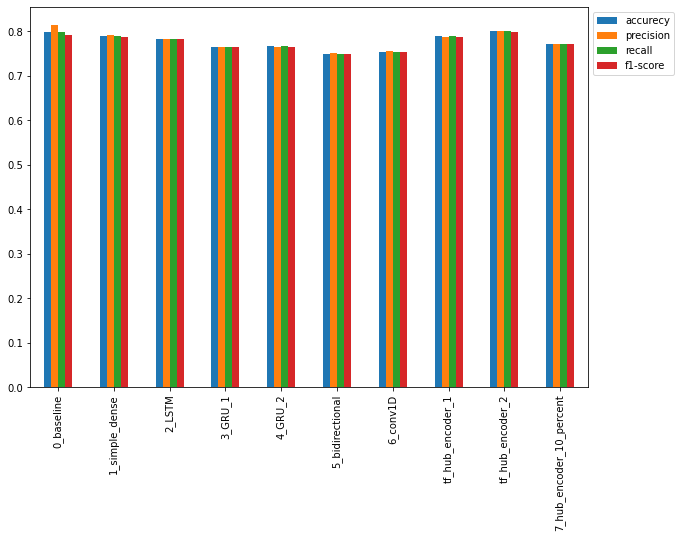

In [ ]:
all_model_results.plot(
    kind='bar',
    figsize = (10,7),
).legend(bbox_to_anchor=(1.0,1.0));

* **Sorting model valus by F1 score**

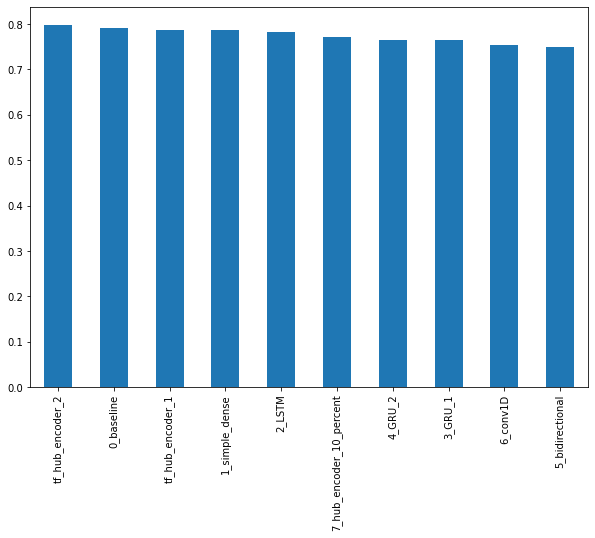

In [ ]:
all_model_results.sort_values('f1-score', ascending=False)['f1-score'].plot(kind='bar', figsize=(10, 7))

* **Uploading model trainning model logs on tensorflow.dev**

In [ ]:
!tensorboard dev upload --logdir ./model_1_logs/ \
  --name 'NLP Model 1: Disaster tweet classification' \
  --description 'comparing different models' \
  --one_shot

* https://tensorboard.dev/experiment/aFg8VzKpRj6Ry1M41djLPQ/#scalars

#Saving Model

In [ ]:
model_7_results

{'accurecy': 0.788575180564675,
 'f1-score': 0.787547777697963,
 'precision': 0.7879892196024489,
 'recall': 0.788575180564675}

In [ ]:
model_8_results

{'accurecy': 0.7997373604727511,
 'f1-score': 0.7986346719749209,
 'precision': 0.7993683117170154,
 'recall': 0.7997373604727511}

* Saving Model in **HDF5 (.h5)** formate

In [ ]:
model_8.save('model_8.h5')

In [ ]:
loaded_model = tf.keras.models.load_model(
    'model_8.h5',
    custom_objects = {'KerasLayer':hub.KerasLayer}
)

In [ ]:
loaded_model.evaluate(val_sentences, val_labels)

48/48 [==============================] - 1s 12ms/step - loss: 0.4838 - accuracy: 0.7997


[0.48383137583732605, 0.7997373342514038]

In [ ]:
loaded_model.summary()

Model: "modes_7_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_10 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


#Finding the most wrong examples